In [3]:
# !pip install openbb --no-cache-dir
# from openbb_terminal.sdk import openbb
# # Install and try using openbb later

분석 해보고 싶은데 감이 안 옴

1. Hot/Cold: 야구나 농구의 hot hand처럼 연속해서 상승/하락 중인 상태를 define
> 참고: https://sabr.org/journal/article/is-a-major-league-hitter-hot-or-cold/
2. Volume 및 가격 변화량을 기반으로 변동성 or 매수/매도 트렌드 파악 -> RSI 지표랑 비슷한 건데 조금 더 정확한 거

위 지표를 기반으로 당장 다음날 상승/하락 여부 판단 or 종가 예측이 가능할까?

In [73]:
import numpy as np
import pandas as pd
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [20]:
stockCode = input("Enter ticker: ")

Enter ticker:  IONQ


In [53]:
ticker = yf.Ticker(stockCode)
price_hist = ticker.history(period="max", interval="1d")
price_hist.shape

(658, 7)

In [90]:
close = price_hist[["Close"]].copy()

sm.tsa.acf(close)

array([1.        , 0.98578659, 0.97125638, 0.95605747, 0.94171824,
       0.93196443, 0.9211055 , 0.90594877, 0.8901869 , 0.87001219,
       0.84988923, 0.83286885, 0.81717451, 0.80158803, 0.78436519,
       0.7624637 , 0.74341103, 0.72624674, 0.71092485, 0.69909931,
       0.68709808, 0.67558148, 0.6633486 , 0.65127071, 0.64051889,
       0.62969822, 0.61860622, 0.60766861, 0.59526668])

In [55]:
adfuller(close)

(-1.6626112036817506,
 0.45047189754771577,
 20,
 637,
 {'1%': -3.44065745275905,
  '5%': -2.8660879520543534,
  '10%': -2.5691919933016076},
 1367.4595938535922)

<Axes: xlabel='Date'>

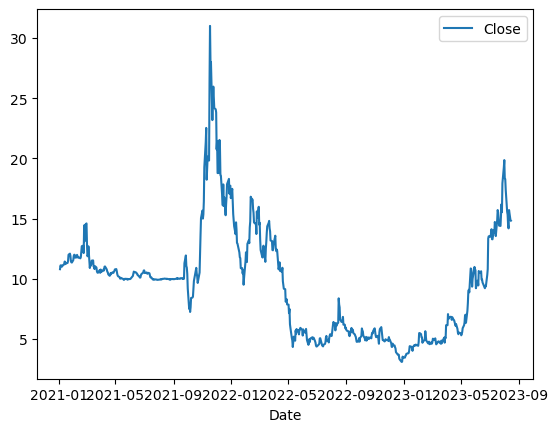

In [56]:
sns.lineplot(data=close)

In [91]:
close["Target"] = close["Close"].shift(-1)
close["Prev"]= close["Close"].shift(1)
close["Diff"] = close["Close"] - close["Prev"]
close["Diff_pct"] = close["Close"] / close["Prev"] - 1
close["Up_down"] = np.where(close["Target"] >= close["Close"], 1, 0)
close = close.rename(columns={"Close":"Today"})
close = close.dropna()
close.head(10)

,Today,Target,Prev,Diff,Diff_pct,Up_down
Date,,,,,,
2021-01-05 00:00:00-05:00,11.11,11.05,10.80,0.309999,0.028704,0
2021-01-06 00:00:00-05:00,11.05,11.11,11.11,-0.059999,-0.005400,1
2021-01-07 00:00:00-05:00,11.11,11.01,11.05,0.059999,0.005430,0
2021-01-08 00:00:00-05:00,11.01,11.17,11.11,-0.099999,-0.009001,1
2021-01-11 00:00:00-05:00,11.17,11.18,11.01,0.160000,0.014532,1
2021-01-12 00:00:00-05:00,11.18,11.20,11.17,0.010000,0.000895,1
2021-01-13 00:00:00-05:00,11.20,11.44,11.18,0.020000,0.001789,1
2021-01-14 00:00:00-05:00,11.44,11.22,11.20,0.240000,0.021429,0
2021-01-15 00:00:00-05:00,11.22,11.32,11.44,-0.219999,-0.019231,1


<Axes: xlabel='Date'>

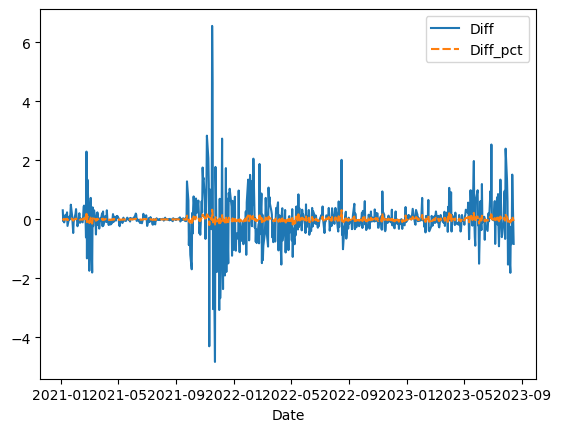

In [83]:
sns.lineplot(close[["Diff", "Diff_pct"]])

In [84]:
adfuller(close["Diff"])

(-6.884239709318503,
 1.407888306140551e-09,
 19,
 636,
 {'1%': -3.4406737255613256,
  '5%': -2.866095119842903,
  '10%': -2.5691958123689727},
 1366.107924010928)

In [85]:
sm.tsa.acf(close["Diff"])

array([ 1.        ,  0.01002606,  0.01335076, -0.01016581, -0.17921277,
        0.02878488,  0.15969914, -0.00455706,  0.15370621, -0.00217086,
       -0.14179248, -0.0412904 ,  0.01543272,  0.09665776,  0.16820496,
       -0.09328304, -0.0579122 , -0.07055714, -0.14095117, -0.00316463,
       -0.02252479,  0.03934004,  0.01431439, -0.06356885, -0.00128441,
        0.0225119 , -0.00798228,  0.06750742, -0.02418404])

In [86]:
sm.tsa.acf(close["Diff_pct"])

array([ 1.        ,  0.01750154,  0.08071418, -0.04686549, -0.02706187,
       -0.01404153,  0.04172779,  0.02159996,  0.02650538,  0.1112718 ,
       -0.06677204, -0.02564613,  0.01775963,  0.07917638,  0.11079761,
       -0.08033504, -0.06647287, -0.0762968 , -0.03673694, -0.06146272,
        0.02251894,  0.01832995,  0.03861514, -0.02402883, -0.02774125,
        0.00240572, -0.04399252,  0.05371016,  0.04304279])

In [92]:
sm.tsa.acf(close["Up_down"])

array([ 1.        ,  0.05934452,  0.09745733, -0.00468549,  0.00293698,
       -0.06261742,  0.04257418, -0.05347057,  0.0303499 ,  0.00138393,
       -0.02148396, -0.05956915, -0.00618326, -0.01377809,  0.03345394,
       -0.11137537,  0.01820851, -0.02603052,  0.02427844, -0.01688367,
       -0.02755542,  0.02885161,  0.06086636, -0.04127646,  0.00293442,
        0.00445881, -0.00928986,  0.07458638,  0.04864156])

In [93]:
close.corr()

,Today,Target,Prev,Diff,Diff_pct,Up_down
Today,1.000000,0.986874,0.986845,0.087295,0.087636,-0.054858
Target,0.986874,1.000000,0.973453,0.088857,0.092074,0.032893
Prev,0.986845,0.973453,1.000000,-0.074904,-0.054233,-0.057397
Diff,0.087295,0.088857,-0.074904,1.000000,0.874735,0.015301
Diff_pct,0.087636,0.092074,-0.054233,0.874735,1.000000,0.030080
Up_down,-0.054858,0.032893,-0.057397,0.015301,0.030080,1.000000


"-----"

In [68]:
data = price_hist.drop(columns=["Dividends", "Stock Splits"]).copy()
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04 00:00:00-05:00,11.125,11.25,10.50,10.80,150500
2021-01-05 00:00:00-05:00,10.850,11.83,10.75,11.11,165300
2021-01-06 00:00:00-05:00,11.500,11.50,11.00,11.05,175600
2021-01-07 00:00:00-05:00,11.500,11.50,11.05,11.11,94200
2021-01-08 00:00:00-05:00,11.650,12.35,11.00,11.01,137500


In [70]:
data["Close_Open"] = data["Close"] - data["Open"]
data["High_Low"] = data["High"] - data["Low"]
data.head()

,Open,High,Low,Close,Volume,DailyChange,Close_Open,High_Low
Date,,,,,,,,
2021-01-04 00:00:00-05:00,11.125,11.25,10.50,10.80,150500,-0.325000,-0.325000,0.75
2021-01-05 00:00:00-05:00,10.850,11.83,10.75,11.11,165300,0.259999,0.259999,1.08
2021-01-06 00:00:00-05:00,11.500,11.50,11.00,11.05,175600,-0.450000,-0.450000,0.50
2021-01-07 00:00:00-05:00,11.500,11.50,11.05,11.11,94200,-0.390000,-0.390000,0.45
2021-01-08 00:00:00-05:00,11.650,12.35,11.00,11.01,137500,-0.639999,-0.639999,1.35


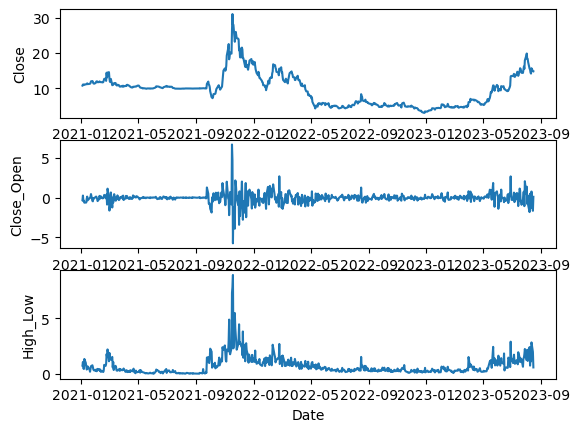

In [77]:
fig, ax = plt.subplots(3, 1)

sns.lineplot(data=data["Close"], ax=ax[0])
sns.lineplot(data=data["Close_Open"], ax=ax[1])
sns.lineplot(data=data["High_Low"], ax=ax[2])

plt.show()